In [400]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_flights = pd.read_csv("DelayedFlights.csv")
print(df_flights.info())
df_flights = df_flights.sample(1000, random_state = 27) # Sample muy pequeña para poder ejecutar sin que consuma mucho tiempo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [401]:
# Utilizar solo datos numéricos
flights_int = df_flights.loc[:,(df_flights.dtypes=='int').values]
flights_float = df_flights.loc[:,(df_flights.dtypes=='float').values]
df_flights = pd.concat([flights_int, flights_float], axis=1)

df_flights.drop(columns = 'Unnamed: 0', inplace=True) # Esta columna es como un Id, así que no la necesitamos. 
# Conservo FlightNum porque la asignación de números de vuelo suele hacerse en función de información sobre el trayecto

count_nan_in_df = df_flights.isnull().sum()
print(count_nan_in_df)

Year                   0
Month                  0
DayofMonth             0
DayOfWeek              0
CRSDepTime             0
CRSArrTime             0
FlightNum              0
Distance               0
Cancelled              0
Diverted               0
DepTime                0
ArrTime                4
ActualElapsedTime      4
CRSElapsedTime         0
AirTime                4
ArrDelay               4
DepDelay               0
TaxiIn                 4
TaxiOut                1
CarrierDelay         380
WeatherDelay         380
NASDelay             380
SecurityDelay        380
LateAircraftDelay    380
dtype: int64


Al comprobar la existencia de valores nulos por columna, me llamó especialmente la atención que hubiera tres instancias de ArrTime. Esto quiere decir que hay vuelos sin hora de llegada. Para investigar acerca la causa de esta falta de información, visualicé las filas con ArrTime nulo. 

In [402]:
df_nan = df_flights.loc[df_flights['ArrTime'].isna() == True]

#Eliminar algunas columnas del df para poder verlas todas
df_nan.drop(columns = ['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], inplace=True)
display(df_nan)

/Users/claradv/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,FlightNum,Distance,Cancelled,Diverted,DepTime,ArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,TaxiIn,TaxiOut
1765012,2008,12,26,5,1500,1620,1810,423,0,1,1726.0,NaN,NaN,80.0,NaN,NaN,7.0
1864381,2008,12,21,7,850,1245,25,2603,1,0,1518.0,NaN,NaN,355.0,NaN,NaN,NaN
1493520,2008,9,21,7,615,630,4176,296,0,1,730.0,NaN,NaN,75.0,NaN,NaN,21.0
37854,2008,1,31,4,600,808,2089,643,0,1,633.0,NaN,NaN,128.0,NaN,NaN,10.0


Todos los vuelos con ArrTime nulo están Cancelled o Diverted y su ActualElapsedTime es nulo también. 

Después, decidí comprobar si todos los vuelos cancelados o desviados se correspondían con aquellos que no tenían duración (ActualElapsedTime como Nan).

In [403]:
df_diverted = df_flights.loc[df_flights['Diverted'] > 0]
df_diverted.drop(columns = ['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], inplace=True)
display(df_diverted)

/Users/claradv/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,FlightNum,Distance,Cancelled,Diverted,DepTime,ArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,TaxiIn,TaxiOut
1765012,2008,12,26,5,1500,1620,1810,423,0,1,1726.0,NaN,NaN,80.0,NaN,NaN,7.0
1493520,2008,9,21,7,615,630,4176,296,0,1,730.0,NaN,NaN,75.0,NaN,NaN,21.0
37854,2008,1,31,4,600,808,2089,643,0,1,633.0,NaN,NaN,128.0,NaN,NaN,10.0


In [404]:
df_cancelled = df_flights.loc[df_flights['Cancelled'] > 0]
df_cancelled.drop(columns = ['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], inplace=True)
display(df_cancelled)

/Users/claradv/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,FlightNum,Distance,Cancelled,Diverted,DepTime,ArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,TaxiIn,TaxiOut
1864381,2008,12,21,7,850,1245,25,2603,1,0,1518.0,NaN,NaN,355.0,NaN,NaN,NaN


Los vuelos Cancelled o Diverted (cancelados o desviados) en ocasiones tienen ArrTime y siempre DepDelay (retraso en la salida). Por tanto, algunos llegaron a tener hora de llegada programada. Sin embargo, el ActualElapsedTime siempre es nulo. Es decir, estos vuelos no han tenido duración (porque no han ocurrido).

Como última comprobación, me aseguro de que los vuelos con duración nula son los mismos que el conjunto de cancelados y desviados.

In [405]:
df_ActualElapsedTime = df_flights.loc[df_flights['ActualElapsedTime'].isna() == True]

print(len(df_ActualElapsedTime))
print(len(df_cancelled) + len(df_diverted))

display(df_ActualElapsedTime)
display(pd.concat([df_cancelled, df_diverted]))

4
4


,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,FlightNum,Distance,Cancelled,Diverted,...,AirTime,ArrDelay,DepDelay,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1765012,2008,12,26,5,1500,1620,1810,423,0,1,...,NaN,NaN,146.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN
1864381,2008,12,21,7,850,1245,25,2603,1,0,...,NaN,NaN,388.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1493520,2008,9,21,7,615,630,4176,296,0,1,...,NaN,NaN,75.0,NaN,21.0,NaN,NaN,NaN,NaN,NaN
37854,2008,1,31,4,600,808,2089,643,0,1,...,NaN,NaN,33.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN


,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,FlightNum,Distance,Cancelled,Diverted,DepTime,ArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,TaxiIn,TaxiOut
1864381,2008,12,21,7,850,1245,25,2603,1,0,1518.0,NaN,NaN,355.0,NaN,NaN,NaN
1765012,2008,12,26,5,1500,1620,1810,423,0,1,1726.0,NaN,NaN,80.0,NaN,NaN,7.0
1493520,2008,9,21,7,615,630,4176,296,0,1,730.0,NaN,NaN,75.0,NaN,NaN,21.0
37854,2008,1,31,4,600,808,2089,643,0,1,633.0,NaN,NaN,128.0,NaN,NaN,10.0


Es necesario sustituir los valores Nan para que el modelo de aprendizaje pueda procesarlos. Sin embargo, los valores nulos de ArrTime y ActualElapsedTime se corresponden con horas de llegada y duraciones respectivamente, por lo que no tiene sentido inferirlo. No es información que falte, sino que nunca existió.

Ante esta situación, consideré eliminar las filas con ActualElapsedTime nulo. Se trata de vuelos que nunca se han producido, y que, por tanto, no pueden estar retrasados ni no retrasados. Como estos vuelos no llegaron a existir, no tiene sentido que el modelo utilice esta información para predecir retrasos.

Además, en el caso de que decidiera incluir esta información en el modelo, ¿cómo podría sustituir los valores nulos de ArrTime y en ActualElapsedTime para que fueran procesados? Tendría que inferir esta información de alguna manera (quizás equiparando la hora de salida a la hora de llegada), que en cualquier caso resultaría totalmente falsa.

In [406]:
df_flights = df_flights.dropna(subset=['ActualElapsedTime'])
count_nan_in_df = df_flights.isnull().sum()
print (count_nan_in_df)

Year                   0
Month                  0
DayofMonth             0
DayOfWeek              0
CRSDepTime             0
CRSArrTime             0
FlightNum              0
Distance               0
Cancelled              0
Diverted               0
DepTime                0
ArrTime                0
ActualElapsedTime      0
CRSElapsedTime         0
AirTime                0
ArrDelay               0
DepDelay               0
TaxiIn                 0
TaxiOut                0
CarrierDelay         376
WeatherDelay         376
NASDelay             376
SecurityDelay        376
LateAircraftDelay    376
dtype: int64


En las columnas correspondientes a los retrasos, el hecho de que el valor sea nulo significa que el retraso no se ha producido, por lo tanto, puedo atribuirle 0 minutos.

In [407]:
df_flights = df_flights.fillna(0)
count_nan_in_df = df_flights.isnull().sum()
print (count_nan_in_df)

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
CRSDepTime           0
CRSArrTime           0
FlightNum            0
Distance             0
Cancelled            0
Diverted             0
DepTime              0
ArrTime              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
TaxiIn               0
TaxiOut              0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64


Para que la información relativa a horas fuera más adecuada, decidí sustituir DepTime, ArrTime, CRSDepTime y CRSArrTime por nuevas columnas para tratar por separado la hora y los minutos.

In [408]:
df_flights['DepTime'] = df_flights['DepTime'].astype(int)
df_flights['DepTime'] = df_flights['DepTime'].astype(str)
df_flights['DepTime'] = df_flights['DepTime'].str.zfill(4)
df_flights['DepTimeHour'] = pd.to_datetime(df_flights['DepTime'], format='%H%M').dt.hour
df_flights['DepTimeMinutes'] = pd.to_datetime(df_flights['DepTime'], format='%H%M').dt.minute
df_flights.drop(columns = 'DepTime', inplace=True)


df_flights['ArrTime'] = df_flights['ArrTime'].astype(int)
df_flights['ArrTime'] = df_flights['ArrTime'].astype(str)
df_flights['ArrTime'] = df_flights['ArrTime'].str.zfill(4)

"""
Bucle para unificar el formato de las horas de medianoche. 
El formato que admite datetime es 00.
Al ejecutar, esta es la única columna generaba errores porque la medianoche se configuraba como 00 y 24.
Si se utilizara una muestra de datos diferente, es posible que hubiera que aplicar este bucle a otras columnas.
"""
for value in df_flights['ArrTime']:
    if value[:2] == '24':
        value_new = '00' + value[2:]
        df_flights['ArrTime'] = df_flights['ArrTime'].replace(value, value_new)
        
df_flights['ArrTimeHour'] = pd.to_datetime(df_flights['ArrTime'], format='%H%M').dt.hour
df_flights['ArrTimeMinutes'] = pd.to_datetime(df_flights['ArrTime'], format='%H%M').dt.minute
df_flights.drop(columns = 'ArrTime', inplace=True)


df_flights['CRSDepTime'] = df_flights['CRSDepTime'].astype(str)
df_flights['CRSDepTime'] = df_flights['CRSDepTime'].str.zfill(4)
df_flights['CRSDepTimeHour'] = pd.to_datetime(df_flights['CRSDepTime'], format='%H%M').dt.hour
df_flights['CRSDepTimeMinutes'] = pd.to_datetime(df_flights['CRSDepTime'], format='%H%M').dt.minute
df_flights.drop(columns = 'CRSDepTime', inplace=True)


df_flights['CRSArrTime'] = df_flights['CRSArrTime'].astype(str)
df_flights['CRSArrTime'] = df_flights['CRSArrTime'].str.zfill(4)
df_flights['CRSArrTimeHour'] = pd.to_datetime(df_flights['CRSArrTime'], format='%H%M').dt.hour
df_flights['CRSArrTimeMinutes'] = pd.to_datetime(df_flights['CRSArrTime'], format='%H%M').dt.minute
df_flights.drop(columns = 'CRSArrTime', inplace=True)
display(df_flights)

,Year,Month,DayofMonth,DayOfWeek,FlightNum,Distance,Cancelled,Diverted,ActualElapsedTime,CRSElapsedTime,...,SecurityDelay,LateAircraftDelay,DepTimeHour,DepTimeMinutes,ArrTimeHour,ArrTimeMinutes,CRSDepTimeHour,CRSDepTimeMinutes,CRSArrTimeHour,CRSArrTimeMinutes
69342,2008,1,24,4,270,846,0,0,117.0,133.0,...,0.0,170.0,17,43,20,40,14,37,17,50
1691796,2008,11,6,4,743,425,0,0,74.0,82.0,...,0.0,0.0,9,52,12,6,9,41,12,3
394595,2008,3,19,3,3599,319,0,0,63.0,65.0,...,0.0,0.0,11,23,12,26,11,15,12,20
1848099,2008,12,18,4,5496,153,0,0,46.0,57.0,...,0.0,28.0,17,4,17,50,16,0,16,57
900054,2008,6,16,1,459,277,0,0,53.0,60.0,...,0.0,22.0,20,34,22,27,20,5,22,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591593,2008,10,4,6,543,100,0,0,36.0,34.0,...,0.0,16.0,17,33,18,9,17,17,17,51
1882751,2008,12,29,1,496,503,0,0,80.0,104.0,...,0.0,0.0,19,33,21,53,19,20,22,4
1078084,2008,6,7,6,63,732,0,0,128.0,136.0,...,0.0,0.0,19,16,20,24,19,5,20,21
1209618,2008,7,14,1,4688,227,0,0,58.0,60.0,...,0.0,0.0,9,51,10,49,9,45,10,45


A continuación, procedo a crear una nueva columna en el dataset para clasificar los vuelos en retrasados o no retrasados.

In [409]:
def label_delay(row):
    if row['ArrDelay'] > 0:
        return "Delayed"
    else:
        return "Not Delayed"

df_flights['ArrDelayLabels'] = df_flights.apply(lambda row: label_delay(row), axis=1)
display(df_flights['ArrDelayLabels'])

print(df_flights.columns)

69342          Delayed
1691796        Delayed
394595         Delayed
1848099        Delayed
900054         Delayed
              ...     
1591593        Delayed
1882751    Not Delayed
1078084        Delayed
1209618        Delayed
633137         Delayed
Name: ArrDelayLabels, Length: 996, dtype: object

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightNum', 'Distance',
       'Cancelled', 'Diverted', 'ActualElapsedTime', 'CRSElapsedTime',
       'AirTime', 'ArrDelay', 'DepDelay', 'TaxiIn', 'TaxiOut', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'DepTimeHour', 'DepTimeMinutes', 'ArrTimeHour', 'ArrTimeMinutes',
       'CRSDepTimeHour', 'CRSDepTimeMinutes', 'CRSArrTimeHour',
       'CRSArrTimeMinutes', 'ArrDelayLabels'],
      dtype='object')


Creo un dataframe para las features y otro para las labels

In [410]:
df_features = df_flights.copy()
df_features.drop(columns = ['ArrDelay', 'ArrDelayLabels'], inplace=True)
print(df_features.columns)

df_labels = df_flights['ArrDelayLabels']

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightNum', 'Distance',
       'Cancelled', 'Diverted', 'ActualElapsedTime', 'CRSElapsedTime',
       'AirTime', 'DepDelay', 'TaxiIn', 'TaxiOut', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'DepTimeHour', 'DepTimeMinutes', 'ArrTimeHour', 'ArrTimeMinutes',
       'CRSDepTimeHour', 'CRSDepTimeMinutes', 'CRSArrTimeHour',
       'CRSArrTimeMinutes'],
      dtype='object')


## Exercici 1
Agrupa els diferents vols utilitzant l'algorisme de K-means.

En primer lugar, transformo las etiquetas "Delayed" y "Not Delayed" en integers para que puedan ser procesadas

In [411]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(df_labels)
print(true_labels[:20])
label_encoder.classes_

[0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1]


array(['Delayed', 'Not Delayed'], dtype=object)

Antes de crear el modelo KMeans, exploro los datos para saber cómo puedo transformar la variables y así optimizar el resultado del modelo.

En primer lugar, compruebo la existencia de outliers para decidir cómo gestionarlos.

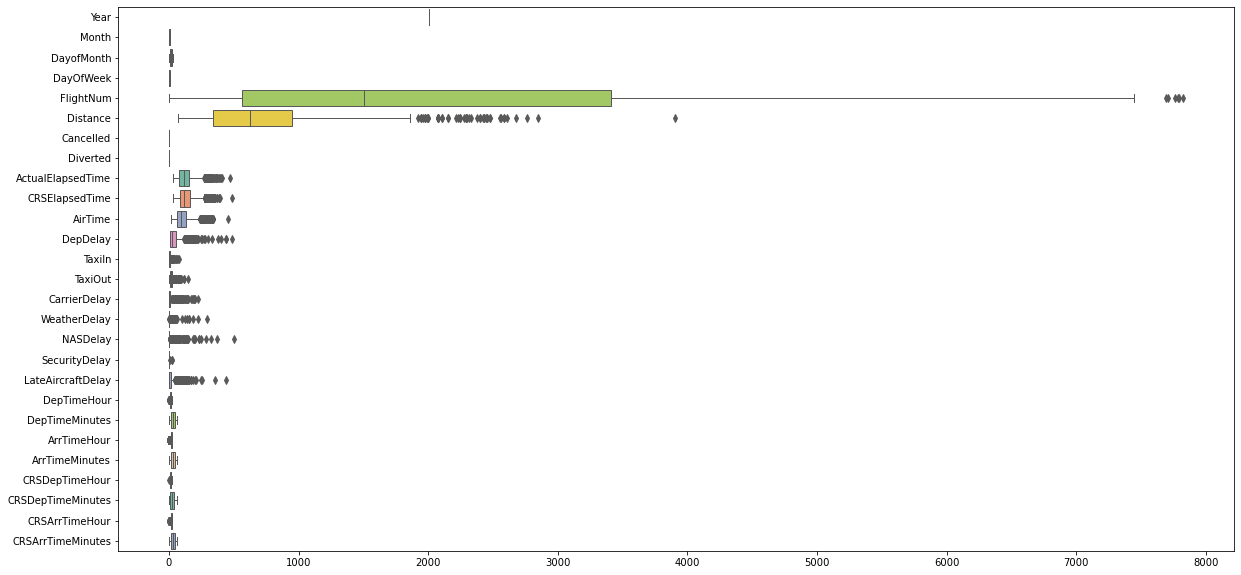

In [412]:
import seaborn as sns
    
ax = sns.boxplot(data=df_features, orient="h", palette="Set2", linewidth=1)
plt.gcf().set_size_inches(20, 10)

Como podemos ver, las variables tienen muchos outliers. Por ello, a la hora de estandarizar los datos, utilizaré RobustScaler. El RobustScaler impide que los valores atípicos distorsionen los resultados ya que elimina la mediana y escala los datos de acuerdo con el rango IQR (el rango entre el primer cuartil, 25, y el tercer cuartil, 75).

Por otro lado, puede comprobarse que este dataset cuenta con un gran número de variables, por lo que puedo reducir la dimensionalidad de los datos.

Transformo los datos para optimizar el resultado del modelo: 
- Estandarizo los datos con RobustScaler para evitar el efecto distorsionador de los valores atípicos
- Reduzco la dimensionalidad con PCA para favorecer la agrupación de datos

In [413]:
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pca = PCA().fit(df_features)

Para encontrar el número de PCA adecuado, visualizo la varianza explicada acumulada

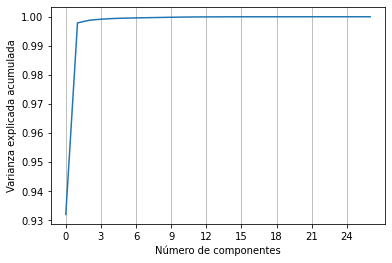

In [414]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid(axis='x')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.xticks(np.arange(0, len(df_features.columns), step=3))
plt.show()

Como puede comprobarse, para explicar prácticamente la totalidad de la varianza hacen falta 3 componentes

In [415]:
preprocessor = Pipeline(
    [
        ("scaler", RobustScaler()),
        ("pca", PCA(n_components=3, random_state=42))
    ]
)

Antes de crear el modelo KMeans, necesito saber con cuántos clusters necesito trabajar. Para ello, recurro al Elbow Method, que muestra la varianza explicada en función del número de clusters

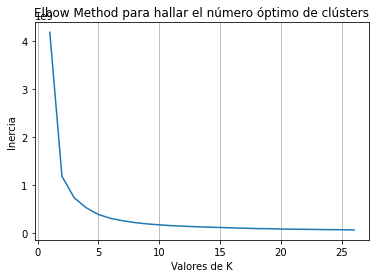

In [416]:
from sklearn.cluster import KMeans

sum_of_squared_distances = []
K = range(1,len(df_features.columns))
for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_features)
    sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,sum_of_squared_distances)
plt.grid(axis='x')
plt.xlabel("Valores de K") 
plt.ylabel("Inercia")
plt.title("Elbow Method para hallar el número óptimo de clústers")
plt.show()

El "codo" de la curva se situaría entre los valores 3 y 5. Como no estoy segura, recurro al módulo KneeLocator.

In [417]:
from kneed import KneeLocator

kl = KneeLocator(range(1, len(df_features.columns)), sum_of_squared_distances, curve="convex", direction="decreasing")
print(kl.elbow)

4


Finalmente decido crear el modelo con 4 clústers.

In [418]:
clusterer = Pipeline([("kmeans", KMeans(n_clusters=4, init="k-means++", n_init=50, max_iter=500, random_state=27))])

In [419]:
pipe = Pipeline([("preprocessor", preprocessor),("clusterer", clusterer)])

In [420]:
pipe.fit(df_features)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', RobustScaler()),
                                 ('pca',
                                  PCA(n_components=3, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=4, n_init=50,
                                         random_state=27))]))])

In [421]:
preprocessed_data = pipe["preprocessor"].transform(df_features)
predicted_labels = pipe["clusterer"]["kmeans"].labels_

Creo un dataframe con los nuevos componentes creados, los clústeres y las etiquetas para visualizar el resultado del modelo

In [422]:
pcadf_kmeans = pd.DataFrame(
    pipe["preprocessor"].transform(df_features),
    columns=["component_1", "component_2", "component_3"]
)

pcadf_kmeans["Cluster"] = pipe["clusterer"]["kmeans"].labels_

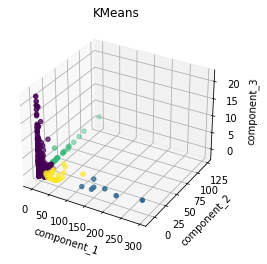

In [423]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pcadf_kmeans.component_1, pcadf_kmeans.component_2, pcadf_kmeans.component_3, c=pcadf_kmeans.Cluster)
ax.set_xlabel('component_1')
ax.set_ylabel('component_2')
ax.set_zlabel('component_3')
ax.set_title('KMeans')
plt.show()

In [424]:
pcadf_kmeans["Etiqueta"] = label_encoder.inverse_transform(true_labels)
display(pcadf_kmeans)

,component_1,component_2,component_3,Cluster,Etiqueta
0,-2.588430,-2.470901,-0.201621,0,Delayed
1,-2.668873,-2.674860,-1.410882,0,Delayed
2,-2.664336,-2.714306,-1.458535,0,Delayed
3,-2.650791,-2.662468,1.267150,0,Delayed
4,-2.655408,-2.674628,-1.444967,0,Delayed
...,...,...,...,...,...
991,-2.661228,-2.701728,-1.295391,0,Delayed
992,-2.658385,-2.604306,-1.492848,0,Not Delayed
993,-2.658663,-2.529830,-1.435762,0,Delayed
994,-2.660976,-2.709471,-1.422131,0,Delayed


A continuación haré una breve descripción de los clusters. En primer lugar, encuentro el número de samples que tiene cada clúster.

In [425]:
clustered_data_num = df_features[['Distance', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'DepDelay', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].assign(Cluster=predicted_labels)

clusters_count = clustered_data_num["Cluster"].value_counts()
display(clusters_count)

0    938
3     28
2     23
1      7
Name: Cluster, dtype: int64

Como vemos, el clúster 0 representa una clara mayoría. Los demás poseen un número de muestras proporcionalmente mucho menor.

Hago una media de únicamente las variables numéricas no relativas a horas y fechas para simplificar el análisis.

In [426]:
clusters_num = clustered_data_num.groupby(['Cluster']).mean().round(2)
display(clusters_num)

,Distance,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Cluster,,,,,,,,,,
0,752.88,130.00,132.80,106.26,39.10,12.49,0.24,5.44,0.06,16.57
1,497.29,116.86,104.86,77.43,198.29,0.00,183.00,15.29,0.00,12.00
2,820.70,181.65,153.09,127.57,171.70,1.48,0.00,196.13,0.00,2.65
3,626.61,137.96,120.39,91.75,59.71,0.82,38.61,22.79,0.00,15.07


- **Clúster 0**: Vuelos de larga distancia y duración. Con retrasos reducidos, pero de todo tipo. Es el que más retraso de LateAircraftDelay presenta.
- **Clúster 1**: Vuelos de media distancia y duración. Con el retraso de salida y debido al clima más elevados. El resto de retrasos son muy reducidos o inexistentes.
- **Clúster 2**: Vuelos de mayor distancia y duración. Con NASDelay notablemente muy elevado respecto al resto, y también con DepDelay muy alto. Resto de retrasos muy bajos o inexistentes.
- **Clúster 3**: Vuelos de distancia media y retrasos reducidos, pero de todo tipo, excepto SecurityDelay.

## Exercici 2
Agrupa els diferents vols utilitzant l'algorisme de clustering jeràrquic

In [427]:
preprocessor = Pipeline(
    [
        ("scaler", RobustScaler()),
        ("pca", PCA(n_components=3, random_state=42))
    ]
)

Antes de crear el modelo, necesito saber cuántos clústeres tendrá. Para ello me serviré de un dendrograma.

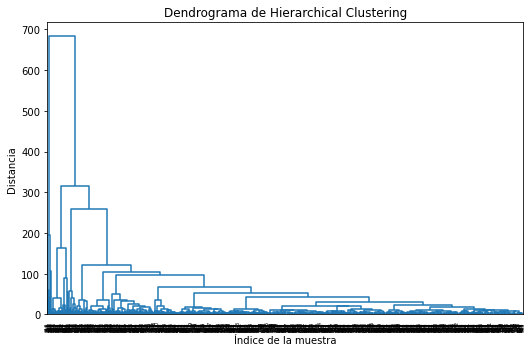

In [428]:
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

scaler = RobustScaler()
features_scaled = scaler.fit_transform(df_features)
df_features_scaled = pd.DataFrame(features_scaled, columns=df_features.columns)

linkage_matrix = linkage(df_features_scaled, 'ward')
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    color_threshold=0,
)
plt.title('Dendrograma de Hierarchical Clustering')
plt.xlabel('Índice de la muestra')
plt.ylabel('Distancia')
plt.tight_layout()
plt.show()

Este dendrograma no se visualiza muy bien, por lo que omitiré los clústeres más pequeños

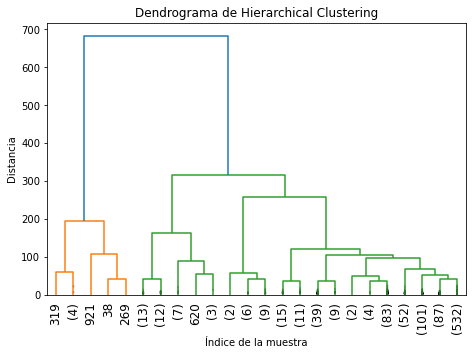

In [429]:
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',
    p=24,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.title('Dendrograma de Hierarchical Clustering')
plt.xlabel('Índice de la muestra')
plt.ylabel('Distancia')
plt.show()

Cuanto mayor sea la distancia de las líneas verticales en el dendrograma, mayor será la distancia entre clústers.

Ahora, podemos establecer un umbral de distancia y dibujar una línea horizontal. En este caso, como es visualmente claro, he establecido el umbral de tal manera que corte la línea vertical más alta. Por tanto, he establecido el umbral en 400.

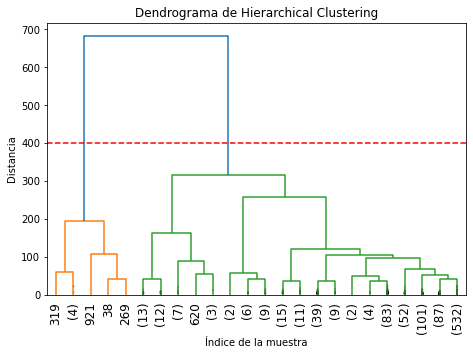

In [430]:
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',
    p=24,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.title('Dendrograma de Hierarchical Clustering')
plt.xlabel('Índice de la muestra')
plt.ylabel('Distancia')
plt.axhline(y=400, color='r', linestyle='--')
plt.show()

El número de clústers será el número de líneas verticales que se cruzan con la línea horizontal dibujada con el umbral. Por tanto, el número de clústers es 2.

In [431]:
from sklearn.cluster import AgglomerativeClustering

clusterer = Pipeline([("hierarchical_clustering", AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='complete'))])

In [432]:
pipe = Pipeline([("preprocessor", preprocessor),("clusterer", clusterer)])

In [433]:
pipe.fit(df_features)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', RobustScaler()),
                                 ('pca',
                                  PCA(n_components=3, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('hierarchical_clustering',
                                  AgglomerativeClustering(affinity='manhattan',
                                                          linkage='complete'))]))])

In [434]:
preprocessed_data = pipe["preprocessor"].transform(df_features)
predicted_labels = pipe["clusterer"]["hierarchical_clustering"].labels_

Creo un dataframe con los nuevos componentes creados, los clústeres y las etiquetas para visualizar el resultado del modelo

In [435]:
pcadf_hierarchical = pd.DataFrame(
    pipe["preprocessor"].transform(df_features),
    columns=["component_1", "component_2", "component_3"]
)

pcadf_hierarchical["Cluster"] = pipe["clusterer"]["hierarchical_clustering"].labels_

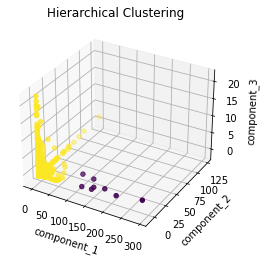

In [436]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pcadf_hierarchical.component_1, pcadf_hierarchical.component_2, pcadf_hierarchical.component_3, c=pcadf_hierarchical.Cluster)
ax.set_xlabel('component_1')
ax.set_ylabel('component_2')
ax.set_zlabel('component_3')
ax.set_title('Hierarchical Clustering')
plt.show()

In [437]:
pcadf_hierarchical["Etiqueta"] = label_encoder.inverse_transform(true_labels)
display(pcadf_hierarchical)

,component_1,component_2,component_3,Cluster,Etiqueta
0,-2.588430,-2.470901,-0.201621,1,Delayed
1,-2.668873,-2.674860,-1.410882,1,Delayed
2,-2.664336,-2.714306,-1.458535,1,Delayed
3,-2.650791,-2.662468,1.267150,1,Delayed
4,-2.655408,-2.674628,-1.444967,1,Delayed
...,...,...,...,...,...
991,-2.661228,-2.701728,-1.295391,1,Delayed
992,-2.658385,-2.604306,-1.492848,1,Not Delayed
993,-2.658663,-2.529830,-1.435762,1,Delayed
994,-2.660976,-2.709471,-1.422131,1,Delayed


A continuación haré una breve descripción de los clusters. En primer lugar, encuentro el número de samples que tiene cada clúster.

In [438]:
clustered_data_num = df_features[['Distance', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'DepDelay', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].assign(Cluster=predicted_labels)

clusters_count = clustered_data_num["Cluster"].value_counts()
display(clusters_count)

1    988
0      8
Name: Cluster, dtype: int64

Como vemos, la gran mayoría de las muestras, 988, queda clasificada en el clúster 1. El clúster 0 lo compone una cantidad muy reducida de 8.

Hago una media únicamente de las variables numéricas no relativas a horas y fechas para simplificar el análisis.

In [439]:
clusters_num = clustered_data_num.groupby(['Cluster']).mean().round(2)
display(clusters_num)

,Distance,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Cluster,,,,,,,,,,
0,531.62,128.12,107.38,81.62,186.00,0.00,172.62,23.62,0.00,10.50
1,750.87,131.35,132.93,106.34,42.71,11.91,1.22,10.30,0.05,16.22


El clúster con menos samples, 0, lo constituyen vuelos de menos distancia, y por tanto menos duración. Estos vuelos, sin embargo, son los que tienen retrasos más largos de cada tipo. Esta diferencia es más notable para los retrasos de salida y los debidos al clima.

El clúster mayoritario, 1, incluye vuelos de más distancia y más duración, y con menos retraso. Para estos vuelos, no obstante, el retraso es mayor para el tipo CarrierDelay y LateAircraftDelay.

## Exercici 3
Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

A continuación mido el rendimiento del modelo a través de la métrica Silhouette.

Silouhette mide la bonanza de un modelo con valores que oscilan entre -1 y 1. Los valores cercano a 1 indican que los clústers están distanciados entre ellos y son muy distinguibles; 0 significa que los clústers son indiferentes o que la distancia entre ellos no es significativa; y valores cercanos a -1, que los clústers no han sido asignados correctamente.

In [440]:
pcadf_kmeans2 = pcadf_kmeans.copy()
pcadf_kmeans2.drop('Etiqueta', axis=1, inplace=True)

pcadf_hierarchical2 = pcadf_hierarchical.copy()
pcadf_hierarchical2.drop('Etiqueta', axis=1, inplace=True)

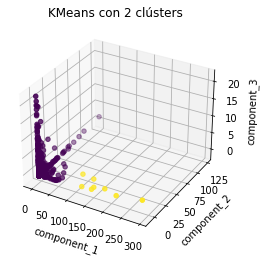

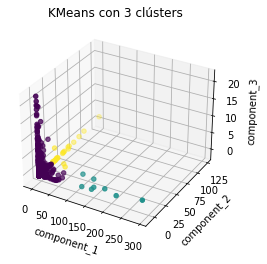

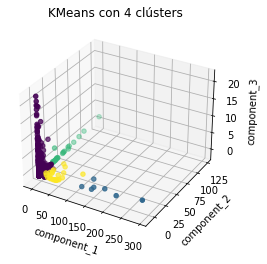

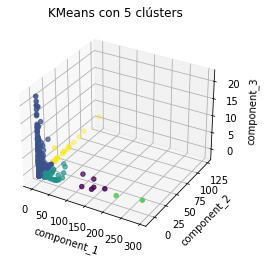

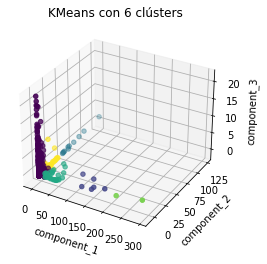

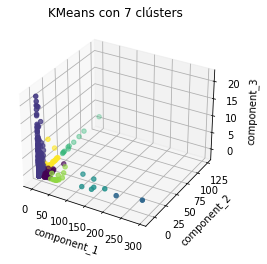

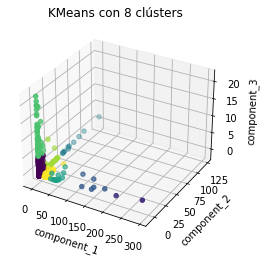

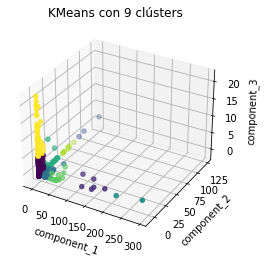

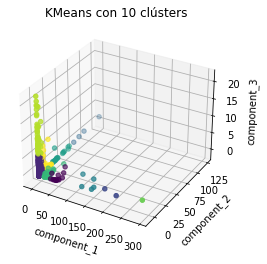

In [445]:
from sklearn.metrics import silhouette_score

silhouette_scores_kmeans = {}
list_silhouette_scores_kmeans = []

for num_clusters in range(2,11):
    model = KMeans(n_clusters=num_clusters, init="k-means++", n_init=50, max_iter=500, random_state=27)

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(pcadf_kmeans2.component_1, 
               pcadf_kmeans2.component_2, 
               pcadf_kmeans2.component_3, 
               c=model.fit_predict(pcadf_kmeans2)
              )
    ax.set_xlabel('component_1')
    ax.set_ylabel('component_2')
    ax.set_zlabel('component_3')
    ax.set_title(f'KMeans con {num_clusters} clústers')

    plt.show()
   
    silhouette_scores_kmeans[f'{num_clusters}'] = silhouette_score(pcadf_kmeans2, model.fit_predict(pcadf_kmeans2))
    list_silhouette_scores_kmeans.append(silhouette_score(pcadf_kmeans2, model.fit_predict(pcadf_kmeans2)))

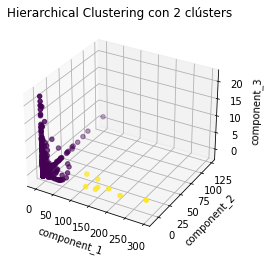

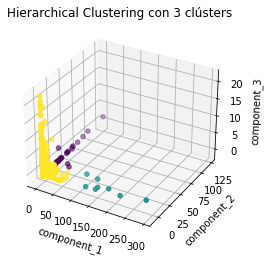

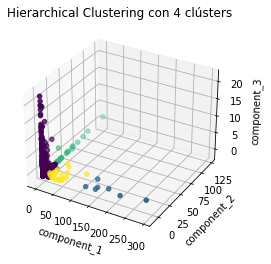

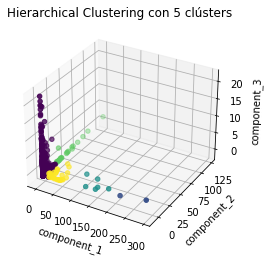

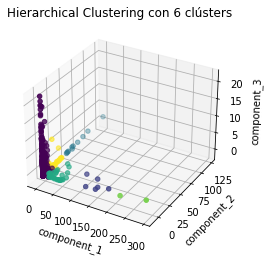

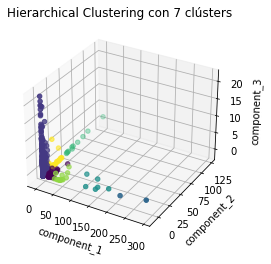

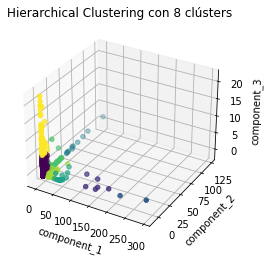

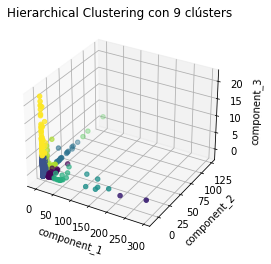

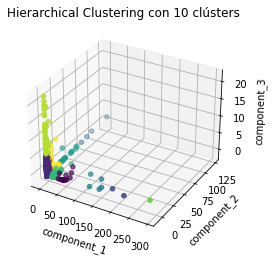

In [444]:
silhouette_scores_hierarchical = {}
list_silhouette_scores_hierarchical = []

for num_clusters in range(2,11):
    model = KMeans(n_clusters=num_clusters, init="k-means++", n_init=50, max_iter=500, random_state=27)

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(pcadf_hierarchical2.component_1, 
               pcadf_hierarchical2.component_2, 
               pcadf_hierarchical2.component_3, 
               c=model.fit_predict(pcadf_hierarchical2)
              )
    ax.set_xlabel('component_1')
    ax.set_ylabel('component_2')
    ax.set_zlabel('component_3')
    ax.set_title(f'Hierarchical Clustering con {num_clusters} clústers')

    plt.show()
   
    silhouette_scores_hierarchical[f'{num_clusters}'] = silhouette_score(pcadf_hierarchical2, 
                                                                         model.fit_predict(pcadf_hierarchical2))
    list_silhouette_scores_hierarchical.append(silhouette_score(pcadf_hierarchical2, 
                                                                model.fit_predict(pcadf_hierarchical2)))

,2,3,4,5,6,7,8,9,10
KMeans,0.947501,0.854865,0.854236,0.844820,0.782861,0.791080,0.710803,0.710705,0.725465
Hierarchical,0.947558,0.850656,0.853673,0.844385,0.782770,0.791286,0.715789,0.724267,0.725665


Text(0, 0.5, 'Resultado Silhouette')

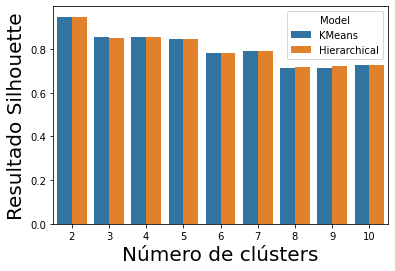

In [443]:
index = ['KMeans', 'Hierarchical']

df_metrics = pd.DataFrame({}, index=index)

for num_clusters in range(2,11):
    df_metrics[f'{num_clusters}'] = [silhouette_scores_kmeans[f'{num_clusters}'], silhouette_scores_hierarchical[f'{num_clusters}']]
display(df_metrics)

df_scores = pd.DataFrame()
df_scores['Scores'] = list_silhouette_scores_kmeans + list_silhouette_scores_hierarchical 
df_scores['Model'] = ['KMeans' for i in range(9)] + ['Hierarchical' for i in range(9)]
df_scores['NumClusters'] = [i for i in range(2,11)] + [i for i in range(2,11)]

ax = sns.barplot(x="NumClusters", y="Scores", hue="Model", data=df_scores)
plt.xlabel('Número de clústers', fontsize = 20)
plt.ylabel('Resultado Silhouette', fontsize = 20)

Como podemos comprobar, el rendimiento es óptimo para ambos modelos cuando el número de clústers es 2. Podemos encontrar una excepción cuando el número de clústers es 7, ya que la puntuación mejora ligeramente respecto a 6. 

Según va aumentando el número de clústers, la puntuación de Silhouette disminuye. Esto quiere decir que cuantos más clústers, menos diferenciables y separados entre ellos estarán, como puede apreciarse en los scatterplots generados anteriormente.

Para Hierarchical Clustering hemos hallado el número de clústers con el dendrograma. Este número se corresponde con los resultados óptimos de Silhouette. En cambio, para KMeans hemos recurrido al Elbow Method y hemos elegido 4 clústers. Por tanto, de acuerdo con la métrica Silhouette podríamos mejorar el rendimiento del modelo ajustando el número de clústers a 2. 